In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Data
gdpFullDf = pd.read_csv('CleanedData/gdp_per_hour_worked_filtered.csv', index_col=0)

In [3]:
gdpFullDf.head()

,year,iso3c,country,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,hours_worked,...,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c,continent,penn_hours_worked_over_pop,hours_worked_over_pop,hours_worked_over_pop_combined,hours_worked_over_pop_predicted,hours_worked_over_pop_modelled
12632,2007,AUS,Australia,20827622.0,10937240.0,9.186995e+11,7.628943e+11,8.544273e+11,1.095250e+12,1803.000000,...,69751.995589,44109.669374,52586.409390,47828.591243,5.0,895.758812,922.244796,922.244796,910.891221,922.244796
12633,2007,AUT,Austria,8295487.0,4201262.0,4.360529e+11,3.271376e+11,3.891856e+11,3.644847e+11,1606.428996,...,77866.496956,52565.073969,43937.712891,67645.310343,4.0,829.445365,777.069005,777.069005,751.812698,777.069005
12636,2007,BEL,Belgium,10625700.0,4728844.0,5.163070e+11,3.909816e+11,4.709222e+11,4.281119e+11,1593.657532,...,82680.171532,48590.400535,40290.227756,73741.553706,4.0,658.800675,658.928353,658.928353,751.812698,658.928353
12654,2007,CAN,Canada,32889025.0,18382598.0,1.509263e+12,1.301593e+12,1.468820e+12,1.384576e+12,1745.000000,...,70805.734407,45889.562129,42098.431220,50845.133236,2.0,898.870758,902.535980,902.535980,872.685869,902.535980
12656,2007,CHE,Switzerland,7551117.0,4307257.0,4.924324e+11,3.845359e+11,4.907547e+11,6.135597e+11,1668.900000,...,89276.283797,65213.180537,81254.170050,69663.070107,4.0,943.117746,936.122689,936.122689,814.328625,936.122689


In [4]:
gdpFullDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 12632 to 16818
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             528 non-null    int64  
 1   iso3c                            528 non-null    object 
 2   country                          528 non-null    object 
 3   pop                              528 non-null    float64
 4   labor_force                      528 non-null    float64
 5   gdp_ppp_c                        528 non-null    float64
 6   gdp_ppp                          528 non-null    float64
 7   gdp                              528 non-null    float64
 8   gdp_c                            528 non-null    float64
 9   hours_worked                     527 non-null    float64
 10  total_hours                      524 non-null    float64
 11  hours_per_employed               524 non-null    float64
 12  gdp_over_k_hours_work

In [5]:
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = gdpFullDf['gdp'] / gdpFullDf['labor_force']

In [5]:
#  Importing Sleep Data
sleepFullDf = pd.read_csv('CleanedData/CombinedAndFilteredSleepData2021-2022.csv', index_col=0)

In [7]:
sleepFullDf.head(100)

,Country,TSTavg,TST SD avg,SOLavg,SOL SD avg,SEavg,SE SD avg,WASOavg,WASO SD avg,SOTwd,SOTwd SD,WTwd,WTwd SD,MSTwd,MSTwd SD
0,South Africa,421.345,40.820,11.700,4.720,85.165,4.485,51.025,20.595,22:37:42,58.59,06:20:56,54.77,02:29:11,53.31
1,Hong Kong (China),400.350,45.095,11.350,3.925,85.055,4.660,47.555,22.050,00:11:29,84.99,07:28:46,79.13,03:50:00,78.81
2,India,386.465,44.655,11.915,3.875,84.215,4.710,48.820,20.085,00:12:20,86.42,07:25:26,89.71,03:48:45,85.49
3,Japan,375.385,47.030,12.840,4.535,83.155,5.120,50.835,22.995,00:27:50,87.11,07:22:04,87.08,03:54:53,83.92
4,Singapore,394.370,46.855,11.680,3.925,84.765,4.815,47.405,21.390,00:12:47,82.59,07:25:45,74.78,03:49:09,75.32
5,South Korea,387.655,46.820,12.455,3.755,84.030,4.870,49.420,21.680,00:05:02,91.44,07:09:59,87.50,03:37:27,86.61
6,Thailand,400.120,43.590,11.665,4.130,85.205,4.395,45.850,20.595,23:56:45,85.36,07:18:01,81.32,03:37:17,80.34
7,Austria,426.070,40.830,11.950,4.440,86.115,4.225,45.715,20.040,23:24:33,67.07,07:03:46,63.80,03:14:01,62.38
8,Belgium,425.835,43.410,11.215,4.200,85.910,4.300,47.290,20.125,23:37:22,61.14,07:19:05,58.05,03:28:05,55.82
9,Czech Republic,424.635,39.745,11.385,4.235,86.400,4.105,43.935,19.285,23:29:12,66.32,07:05:13,63.43,03:17:05,61.98


In [38]:
sleepFullDf['TSTavg'].max()

434.03

In [8]:
totalSleepAvg = sleepFullDf[['Country', 'TSTavg']]

In [44]:
# Filtering GDP to just 2022
gdpPerPop2022 = gdpFullDf[['year', 'country', 'iso3c', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c']]
gdpPerPop2022 = gdpPerPop2022[gdpPerPop2022['year'] == 2022]
gdpPerPop2022.reset_index(drop=True, inplace=True)

In [45]:
gdpPerPop2022['Country'] = gdpPerPop2022['country']
gdpPerPop2022.drop('country', axis=1, inplace=True)

In [46]:
gdpAndSleepMerge = pd.merge(totalSleepAvg, gdpPerPop2022, how='left', on=['Country'])

In [47]:
gdpAndSleepMerge[gdpAndSleepMerge['iso3c'].isna()]
droppedCountries = ['South Africa', 'Hong Kong (China)', 'India', 'Singapore', 'Thailand', 'Ireland', 'Romania', 'Russia', 'UAE', 'Mexico']
# Dropping countries that are out of scope of the original Economist article. 
gdpAndSleepMerge.drop(gdpAndSleepMerge[gdpAndSleepMerge['Country'].isin(droppedCountries)].index, axis=0, inplace=True)

In [48]:
gdpAndSleepMerge[gdpAndSleepMerge['iso3c'].isna()]

,Country,TSTavg,year,iso3c,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c
5,South Korea,387.655,NaN,NaN,NaN,NaN,NaN
9,Czech Republic,424.635,NaN,NaN,NaN,NaN,NaN
24,Slovakia,425.190,NaN,NaN,NaN,NaN,NaN
28,UK,423.410,NaN,NaN,NaN,NaN,NaN
32,USA,420.700,NaN,NaN,NaN,NaN,NaN


In [49]:
gdpPerPop2022['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'United Kingdom', 'Greece', 'Croatia', 'Hungary',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden',
       'United States'], dtype=object)

In [50]:
gdpPerPop2022[gdpPerPop2022['Country'] == 'United Kingdom']

,year,iso3c,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c,Country
12,2022,GBR,89107.167167,106116.310388,62535.053068,United Kingdom


In [61]:
input_countries = ['South Korea', 'Czech Republic', 'Slovakia', 'UK', 'USA']

gdpAndSleepMerge['iso3c'] = np.where(gdpAndSleepMerge['Country'] == 'Slovakia', 'SVK', gdpAndSleepMerge['iso3c'])
gdpAndSleepMerge['iso3c'] = np.where(gdpAndSleepMerge['Country'] == 'South Korea', 'KOR', gdpAndSleepMerge['iso3c'])
gdpAndSleepMerge['iso3c'] = np.where(gdpAndSleepMerge['Country'] == 'Czech Republic', 'CZE', gdpAndSleepMerge['iso3c'])
gdpAndSleepMerge['iso3c'] = np.where(gdpAndSleepMerge['Country'] == 'UK', 'GBR', gdpAndSleepMerge['iso3c'])
gdpAndSleepMerge['iso3c'] = np.where(gdpAndSleepMerge['Country'] == 'USA', 'USA', gdpAndSleepMerge['iso3c'])


In [62]:
gdpAndSleepMerge[gdpAndSleepMerge['Country'].isin(input_countries)]

,Country,TSTavg,year,iso3c,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c
5,South Korea,387.655,NaN,KOR,NaN,NaN,NaN
9,Czech Republic,424.635,NaN,CZE,NaN,NaN,NaN
24,Slovakia,425.190,NaN,SVK,NaN,NaN,NaN
28,UK,423.410,NaN,GBR,NaN,NaN,NaN
32,USA,420.700,NaN,USA,NaN,NaN,NaN


In [63]:
GdpSleep = pd.merge(gdpAndSleepMerge, gdpPerPop2022, how='left', on='iso3c')

In [64]:
GdpSleep.head(40)

,Country_x,TSTavg,year_x,iso3c,gdp_over_labor_force_x,gdp_ppp_over_labor_force_x,gdp_ppp_over_k_hours_worked_c_x,year_y,gdp_over_labor_force_y,gdp_ppp_over_labor_force_y,gdp_ppp_over_k_hours_worked_c_y,Country_y
0,Japan,375.385,2022.0,JPN,61381.982517,82724.172431,47464.179457,2022,61381.982517,82724.172431,47464.179457,Japan
1,South Korea,387.655,NaN,KOR,NaN,NaN,NaN,2022,57022.262544,88517.372003,44081.597602,"Korea, Rep."
2,Austria,426.070,2022.0,AUT,98739.338466,128673.595631,75494.746676,2022,98739.338466,128673.595631,75494.746676,Austria
3,Belgium,425.835,2022.0,BEL,108138.030531,141821.760841,79863.425726,2022,108138.030531,141821.760841,79863.425726,Belgium
4,Czech Republic,424.635,NaN,CZE,NaN,NaN,NaN,2022,54678.533467,98809.965108,45876.082414,Czechia
5,Denmark,421.610,2022.0,DNK,126239.605954,139474.255198,81223.733351,2022,126239.605954,139474.255198,81223.733351,Denmark
6,Estonia,430.215,2022.0,EST,52029.678076,85754.434797,43005.324137,2022,52029.678076,85754.434797,43005.324137,Estonia
7,Finland,434.030,2022.0,FIN,99474.075112,116185.581863,66611.368501,2022,99474.075112,116185.581863,66611.368501,Finland
8,France,423.570,2022.0,FRA,87927.906825,119113.477889,69656.848125,2022,87927.906825,119113.477889,69656.848125,France
9,Germany,423.735,2022.0,DEU,91478.449844,119275.954363,73730.332441,2022,91478.449844,119275.954363,73730.332441,Germany


In [65]:
GdpSleep.drop(['Country_x', 'year_x', 'gdp_over_labor_force_x', 'gdp_ppp_over_labor_force_x', 'gdp_ppp_over_k_hours_worked_c_x'], axis=1, inplace=True)

In [66]:
GdpSleep.rename(columns={'year_y': 'year', 'gdp_over_labor_force_y': 'gdp_over_labor_force', 'Country_y': 'Country', 
                         'gdp_ppp_over_k_hours_worked_c_y':'gdp_ppp_over_k_hours_worked_c', 'gdp_ppp_over_labor_force_y':'gdp_ppp_over_labor_force'}, inplace=True)

In [67]:
gdpAndSleepDf = GdpSleep[['year', 'iso3c', 'Country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c', 'TSTavg']]
gdpAndSleepDf.head(30)

,year,iso3c,Country,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c,TSTavg
0,2022,JPN,Japan,61381.982517,82724.172431,47464.179457,375.385
1,2022,KOR,"Korea, Rep.",57022.262544,88517.372003,44081.597602,387.655
2,2022,AUT,Austria,98739.338466,128673.595631,75494.746676,426.070
3,2022,BEL,Belgium,108138.030531,141821.760841,79863.425726,425.835
4,2022,CZE,Czechia,54678.533467,98809.965108,45876.082414,424.635
5,2022,DNK,Denmark,126239.605954,139474.255198,81223.733351,421.610
6,2022,EST,Estonia,52029.678076,85754.434797,43005.324137,430.215
7,2022,FIN,Finland,99474.075112,116185.581863,66611.368501,434.030
8,2022,FRA,France,87927.906825,119113.477889,69656.848125,423.570
9,2022,DEU,Germany,91478.449844,119275.954363,73730.332441,423.735


<Axes: xlabel='gdp_over_labor_force', ylabel='TSTavg'>

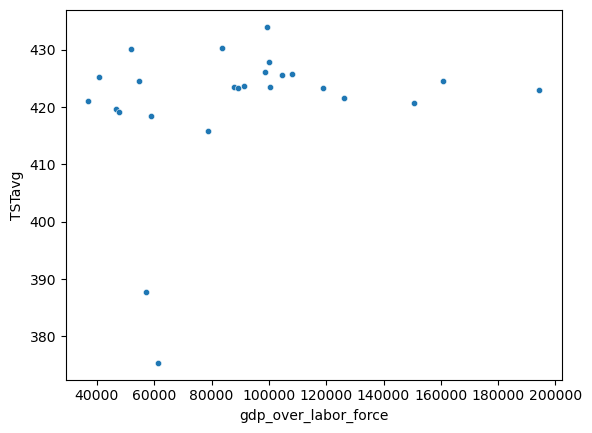

In [23]:
sns.scatterplot(data=gdpAndSleepDf, x='gdp_over_labor_force', y='TSTavg', alpha=1, s=20)

In [24]:
gdpAndSleepDf[['gdp_over_labor_force', 'TSTavg']].corr()

,gdp_over_labor_force,TSTavg
gdp_over_labor_force,1.000000,0.242513
TSTavg,0.242513,1.000000


In [25]:
# Verry little correlation between gdp per person and average sleep times

In [26]:
# Moving on to PPP per labor population

pppPerPop2022 = gdpFullDf[['year', 'iso3c', 'country', 'gdp_ppp_over_labor_force']]
pppPerPop2022 = pppPerPop2022[pppPerPop2022['year'] == 2022]
pppPerPop2022.reset_index(drop=True, inplace=True)

In [27]:
pppPerLaborAndSleep = pd.merge(pppPerPop2022, gdpAndSleepDf, on='iso3c')

In [28]:
pppPerLaborAndSleep.drop(['year_y', 'Country', 'gdp_over_labor_force'], axis=1, inplace=True)
# pppPerPopAndSleep.rename({'year_x': 'year', 'gdp_ppp_over_pop_c': 'gdp_ppp_over_pop'}, axis=1, inplace=True)
pppPerLaborAndSleep.head(30)

,year_x,iso3c,country,gdp_ppp_over_labor_force,TSTavg
0,2022,AUS,Australia,115289.118520,423.260
1,2022,AUT,Austria,128673.595631,426.070
2,2022,BEL,Belgium,141821.760841,425.835
3,2022,CAN,Canada,106511.563739,423.465
4,2022,CHE,Switzerland,145912.647458,424.540
5,2022,CZE,Czechia,98809.965108,424.635
6,2022,DEU,Germany,119275.954363,423.735
7,2022,DNK,Denmark,139474.255198,421.610
8,2022,ESP,Spain,92002.851882,418.525
9,2022,EST,Estonia,85754.434797,430.215


In [29]:
pppPerLaborAndSleep[['gdp_ppp_over_labor_force', 'TSTavg']].corr()

,gdp_ppp_over_labor_force,TSTavg
gdp_ppp_over_labor_force,1.000000,0.256053
TSTavg,0.256053,1.000000


<Axes: xlabel='gdp_ppp_over_labor_force', ylabel='TSTavg'>

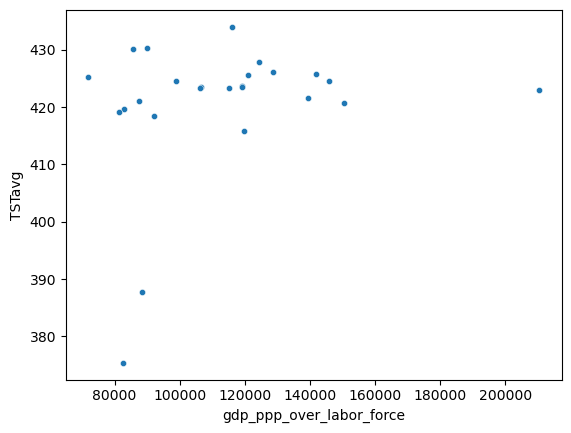

In [30]:
sns.scatterplot(data=pppPerLaborAndSleep, x='gdp_ppp_over_labor_force', y='TSTavg', alpha=1, s=20)

In [31]:
# Investigating ppp per hour of work and sleep
pppPerHour2022 = gdpFullDf[['year', 'iso3c', 'country', 'gdp_ppp_over_k_hours_worked_c']]
pppPerHour2022.rename({'gdp_ppp_over_k_hours_worked_c': 'gdp_ppp_over_hours_worked'}, axis=1, inplace=True)
pppPerHour2022 = pppPerHour2022[pppPerHour2022['year'] == 2022]
pppPerHour2022.reset_index(drop=True, inplace=True)

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_24925/2989679621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pppPerHour2022.rename({'gdp_ppp_over_k_hours_worked_c': 'gdp_ppp_over_hours_worked'}, axis=1, inplace=True)


In [32]:
pppPerHour2022.head(30)

,year,iso3c,country,gdp_ppp_over_hours_worked
0,2022,AUS,Australia,56060.627409
1,2022,AUT,Austria,75494.746676
2,2022,BEL,Belgium,79863.425726
3,2022,CAN,Canada,56688.258465
4,2022,CHE,Switzerland,78838.774703
5,2022,CZE,Czechia,45876.082414
6,2022,DEU,Germany,73730.332441
7,2022,DNK,Denmark,81223.733351
8,2022,ESP,Spain,56250.191276
9,2022,EST,Estonia,43005.324137


In [33]:
pppPerHourAndSleep = pd.merge(pppPerHour2022, pppPerLaborAndSleep, on='iso3c')

In [34]:
pppPerHourAndSleep.head(30)

,year,iso3c,country_x,gdp_ppp_over_hours_worked,year_x,country_y,gdp_ppp_over_labor_force,TSTavg
0,2022,AUS,Australia,56060.627409,2022,Australia,115289.118520,423.260
1,2022,AUT,Austria,75494.746676,2022,Austria,128673.595631,426.070
2,2022,BEL,Belgium,79863.425726,2022,Belgium,141821.760841,425.835
3,2022,CAN,Canada,56688.258465,2022,Canada,106511.563739,423.465
4,2022,CHE,Switzerland,78838.774703,2022,Switzerland,145912.647458,424.540
5,2022,CZE,Czechia,45876.082414,2022,Czechia,98809.965108,424.635
6,2022,DEU,Germany,73730.332441,2022,Germany,119275.954363,423.735
7,2022,DNK,Denmark,81223.733351,2022,Denmark,139474.255198,421.610
8,2022,ESP,Spain,56250.191276,2022,Spain,92002.851882,418.525
9,2022,EST,Estonia,43005.324137,2022,Estonia,85754.434797,430.215


In [35]:
pppPerHourAndSleep['TSTavg'].mean()

420.57620000000003

In [39]:
pppPerHourAndSleep.drop(['country_y', 'gdp_ppp_over_labor_force', 'year_x'], axis=1, inplace=True)
pppPerHourAndSleep.rename({'country_x': 'country'}, axis=1, inplace=True)

In [40]:
pppPerHourAndSleep

,year,iso3c,country,gdp_ppp_over_hours_worked,TSTavg
0,2022,AUS,Australia,56060.627409,423.260
1,2022,AUT,Austria,75494.746676,426.070
2,2022,BEL,Belgium,79863.425726,425.835
3,2022,CAN,Canada,56688.258465,423.465
4,2022,CHE,Switzerland,78838.774703,424.540
5,2022,CZE,Czechia,45876.082414,424.635
6,2022,DEU,Germany,73730.332441,423.735
7,2022,DNK,Denmark,81223.733351,421.610
8,2022,ESP,Spain,56250.191276,418.525
9,2022,EST,Estonia,43005.324137,430.215


<Axes: xlabel='gdp_ppp_over_hours_worked', ylabel='TSTavg'>

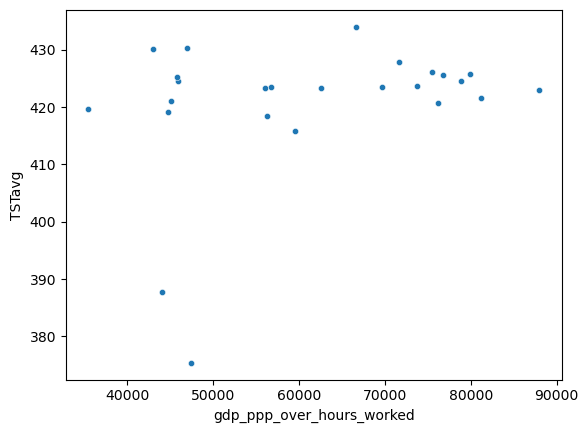

In [41]:
sns.scatterplot(data=pppPerHourAndSleep, x='gdp_ppp_over_hours_worked', y='TSTavg', alpha=1, s=20)

In [42]:
pppPerHourAndSleep[['gdp_ppp_over_hours_worked', 'TSTavg']].corr()

,gdp_ppp_over_hours_worked,TSTavg
gdp_ppp_over_hours_worked,1.00000,0.30484
TSTavg,0.30484,1.00000


In [ ]:
# Correlation coefficients ranging from .24 to .3
# People around the world seem to get similar ammounts of sleep with some subtle outliers like Japan and Korea. This seems unrelated to a country's gdp.

In [77]:
gdpAndSleepDf[['TSTavg', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 
                                                            'gdp_ppp_over_k_hours_worked_c']].corr()

,TSTavg,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c
TSTavg,1.000000,0.242513,0.256053,0.304840
gdp_over_labor_force,0.242513,1.000000,0.932409,0.847175
gdp_ppp_over_labor_force,0.256053,0.932409,1.000000,0.883741
gdp_ppp_over_k_hours_worked_c,0.304840,0.847175,0.883741,1.000000


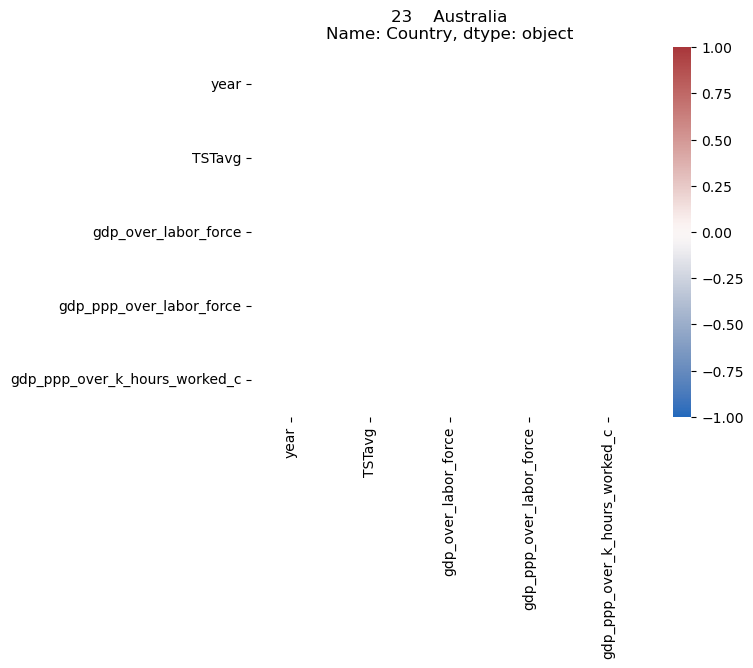

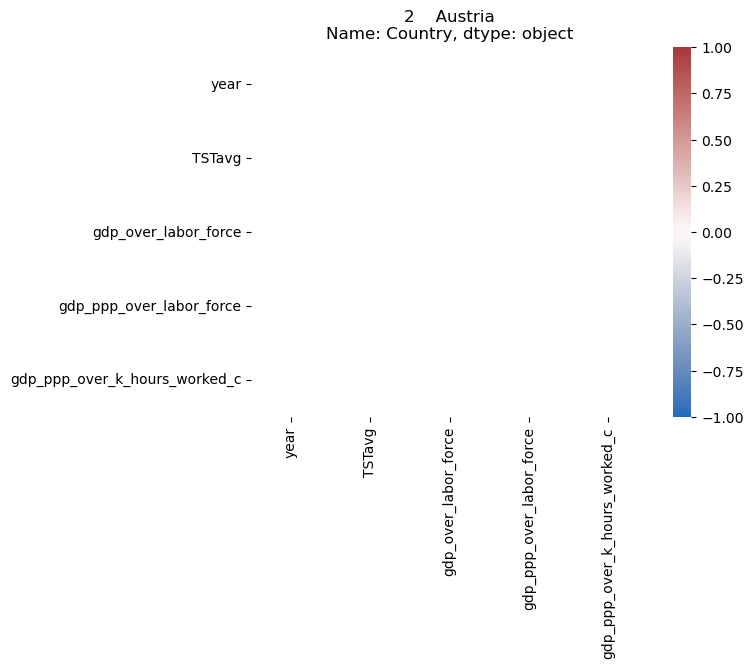

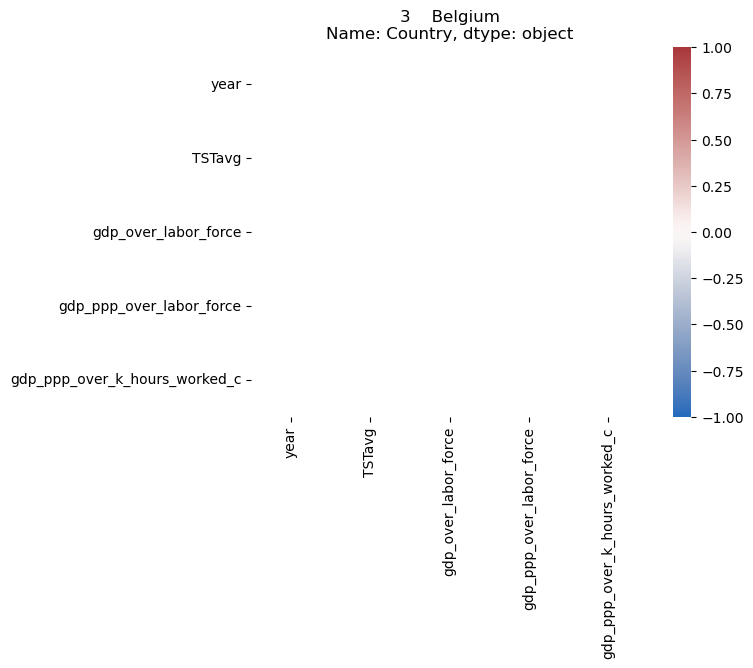

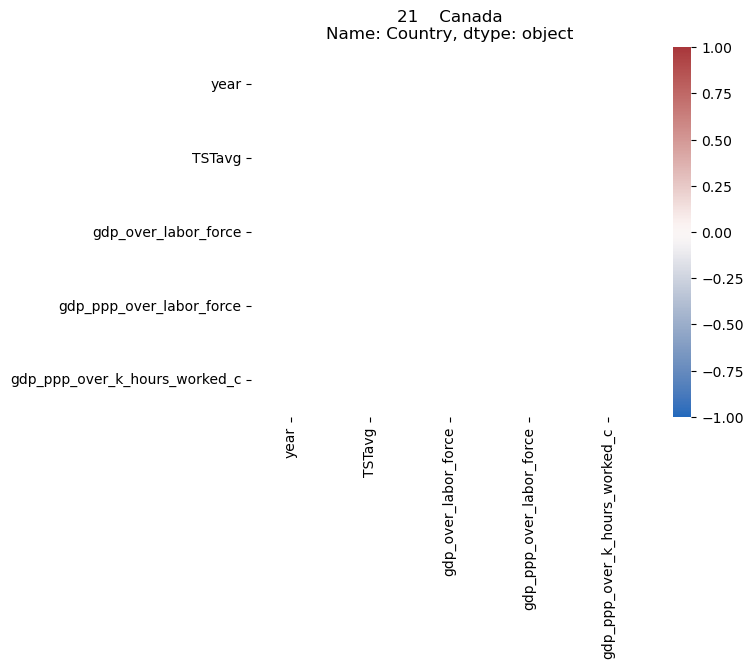

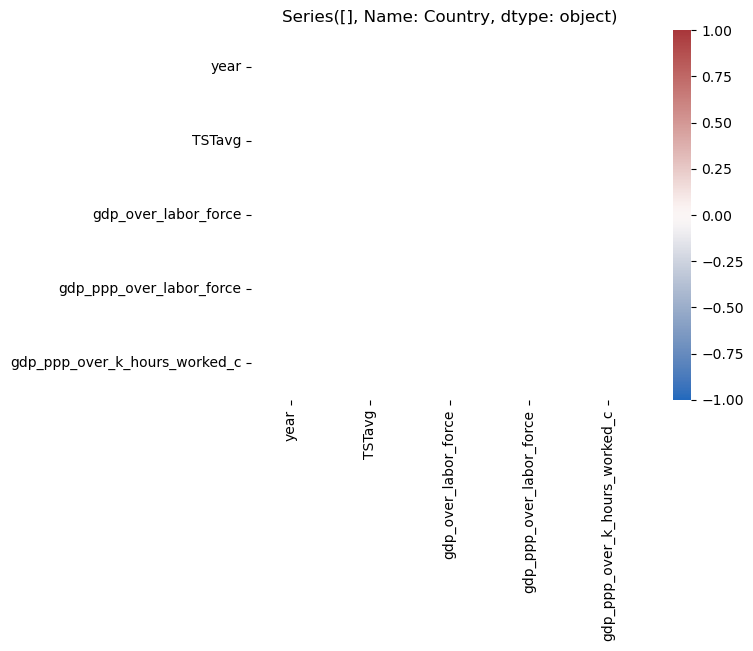

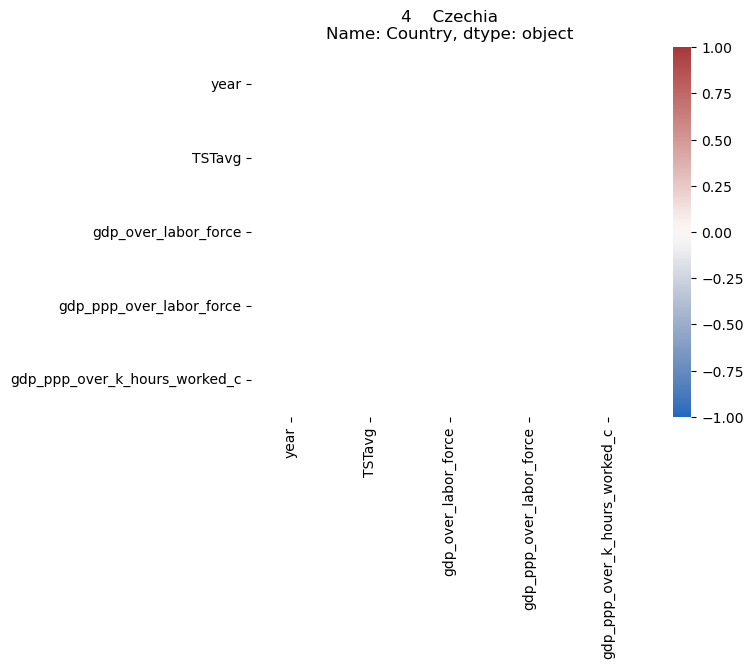

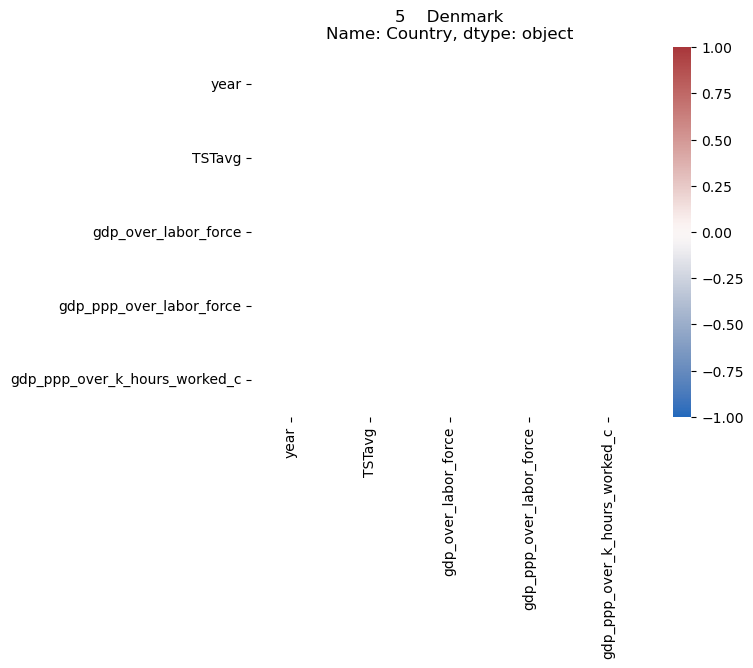

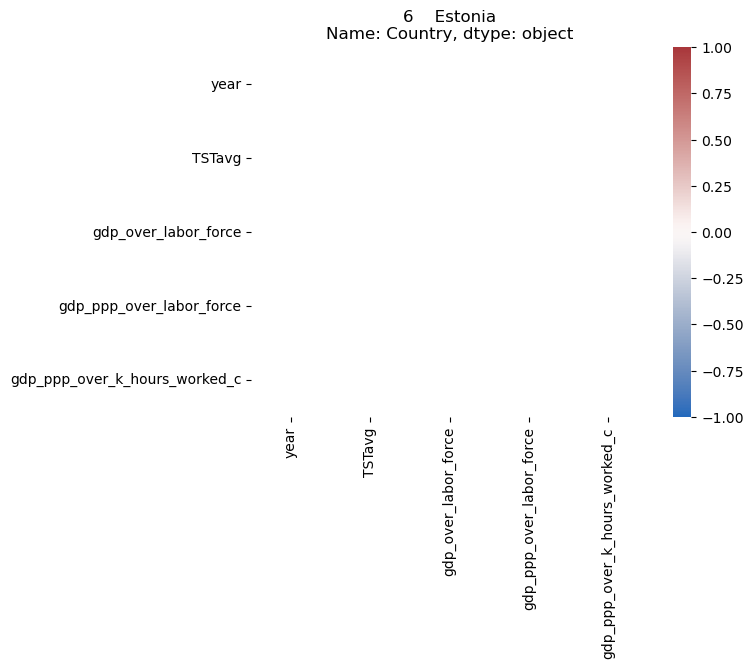

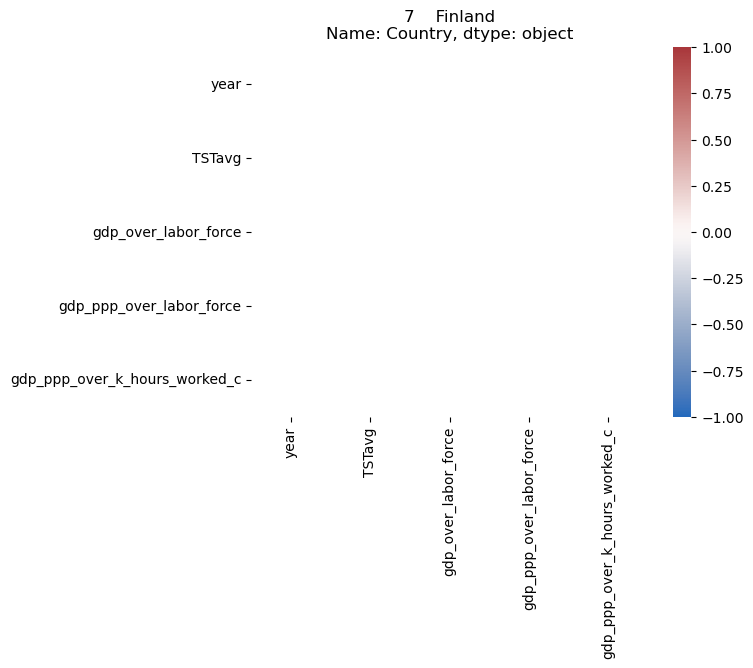

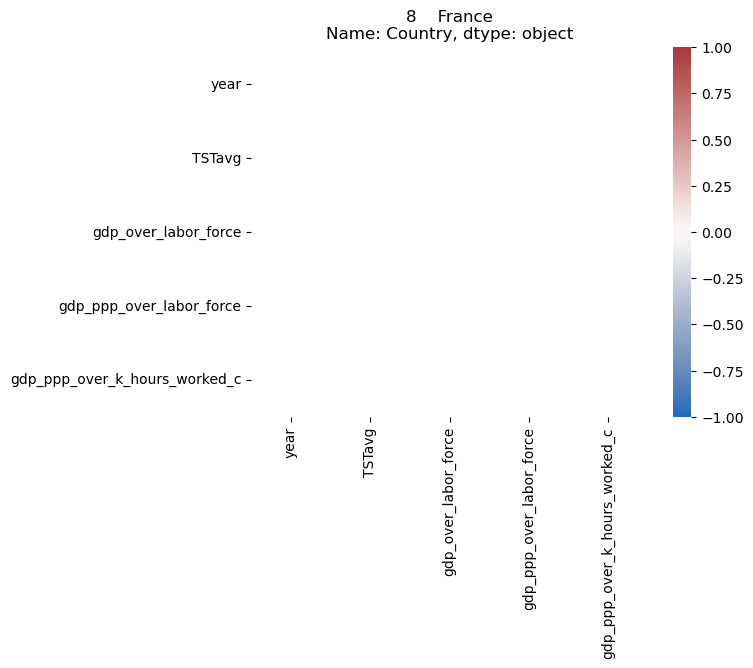

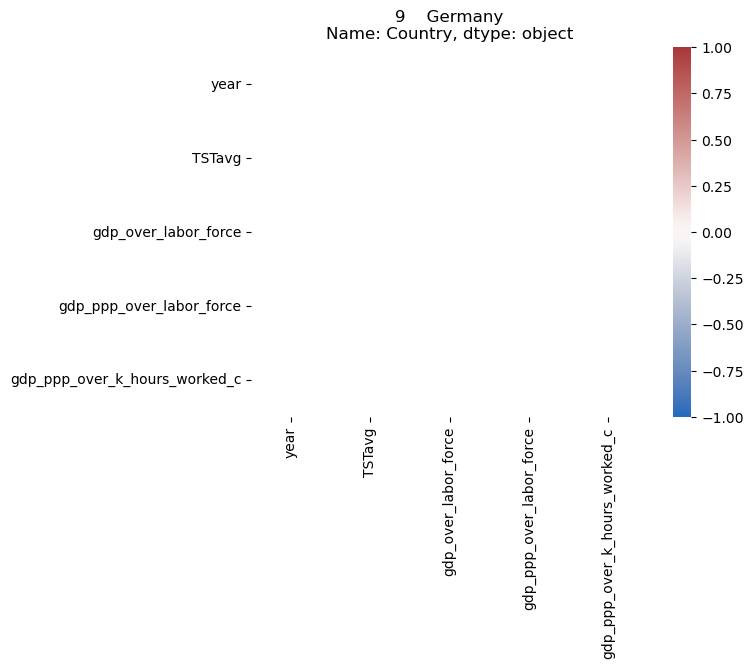

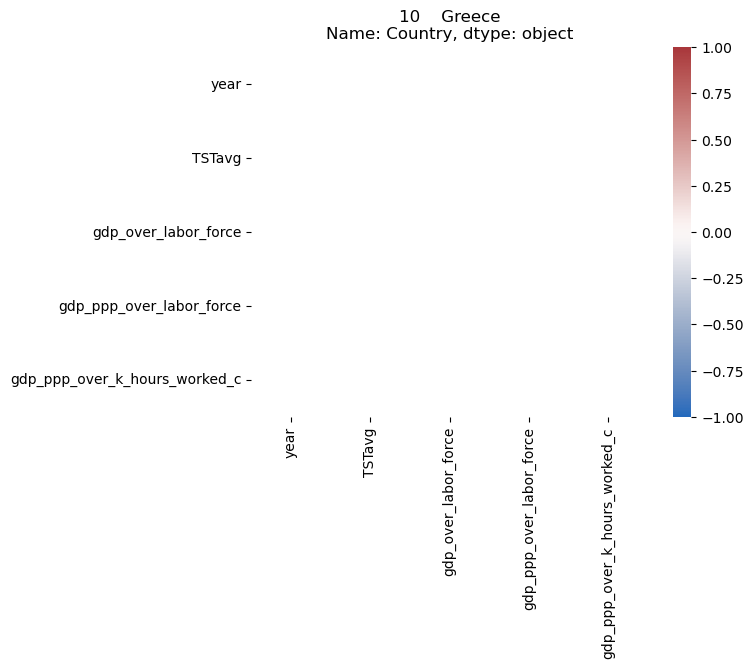

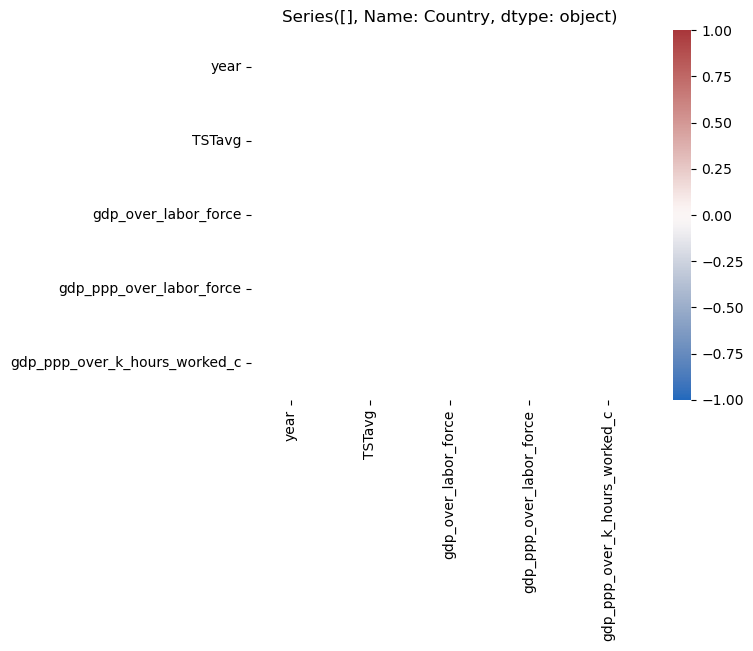

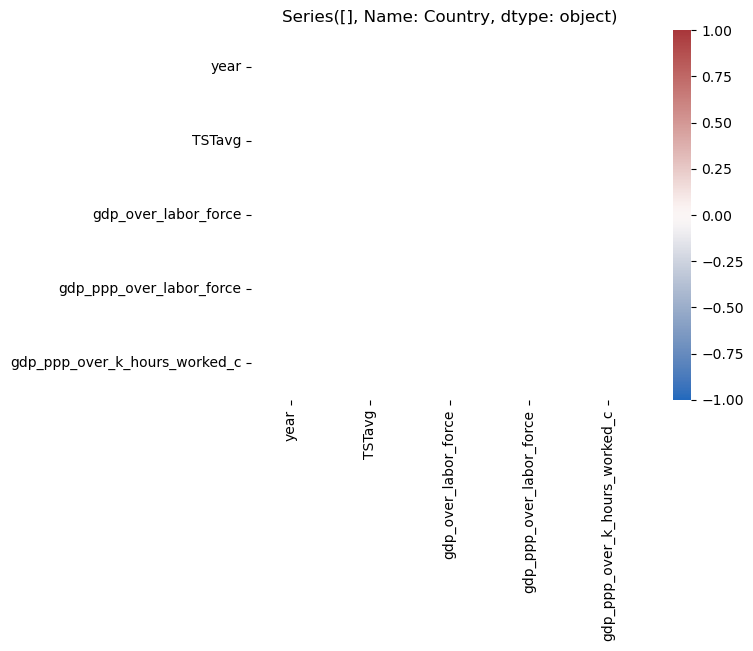

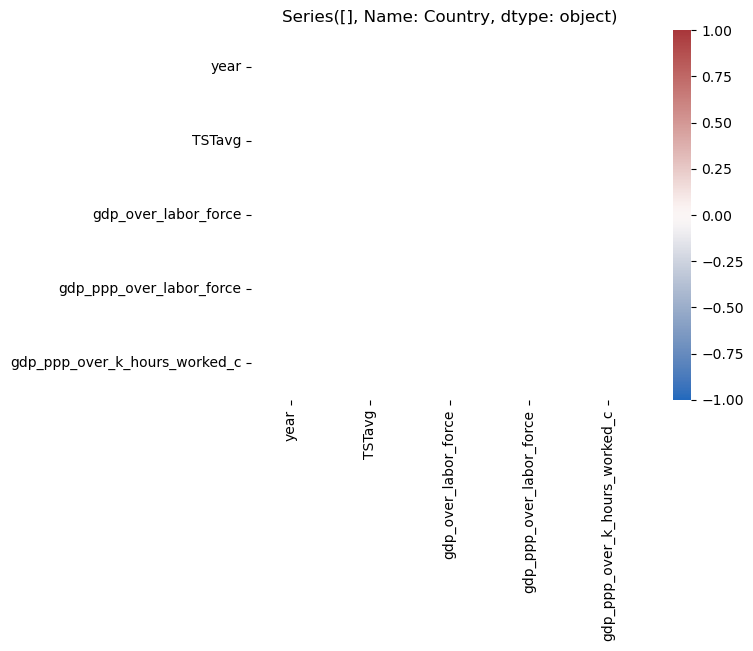

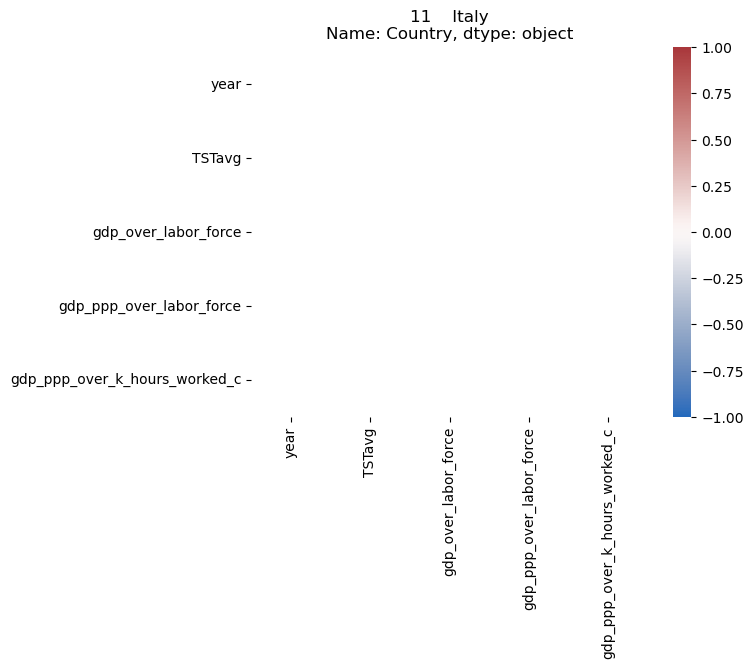

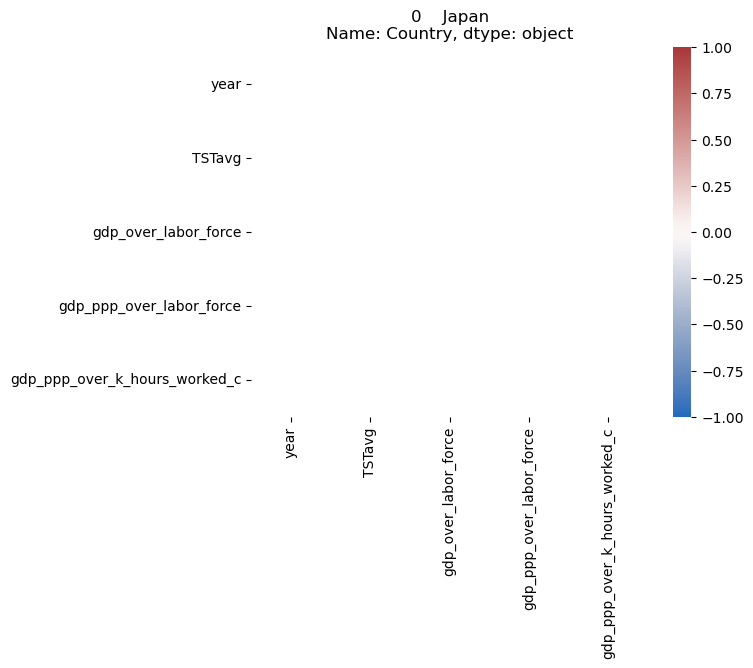

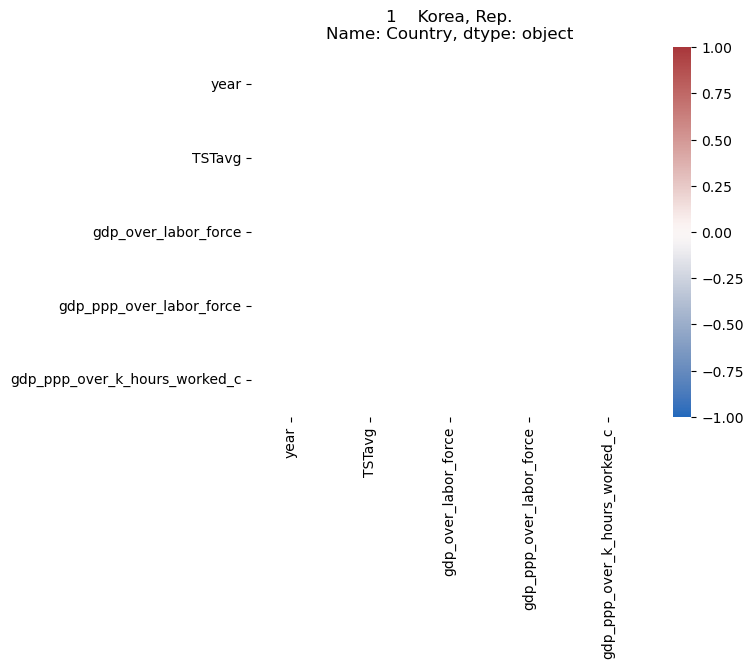

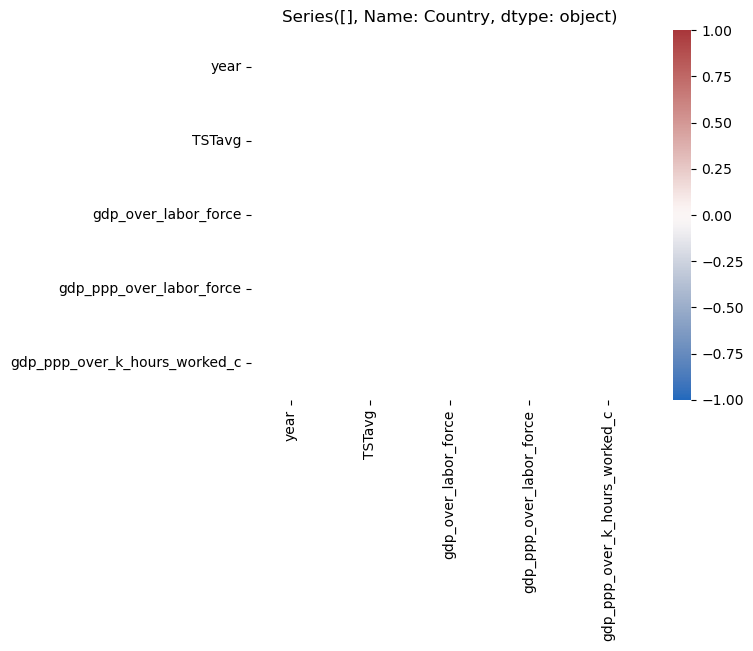

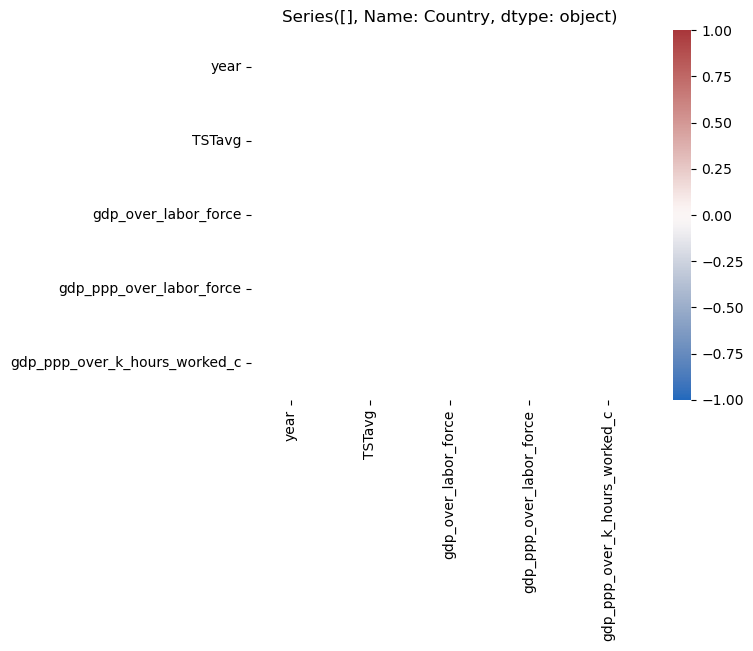

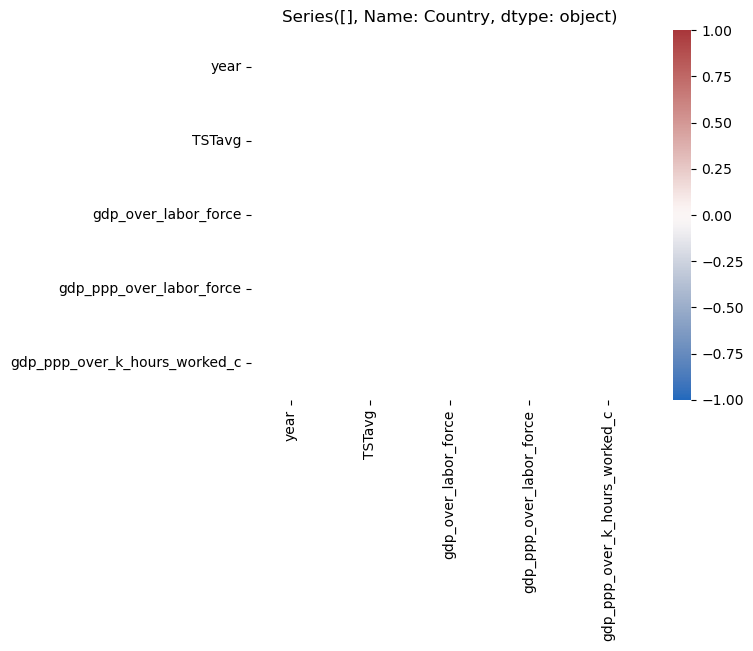

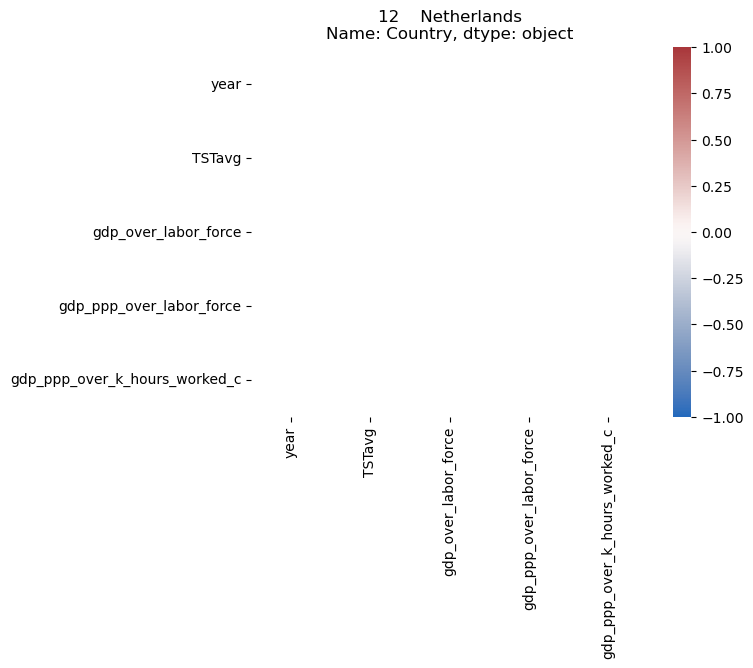

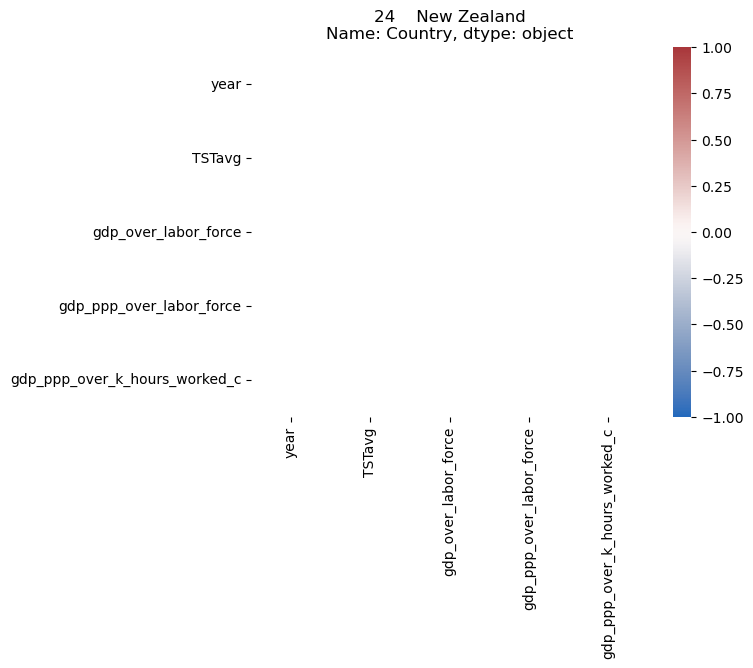

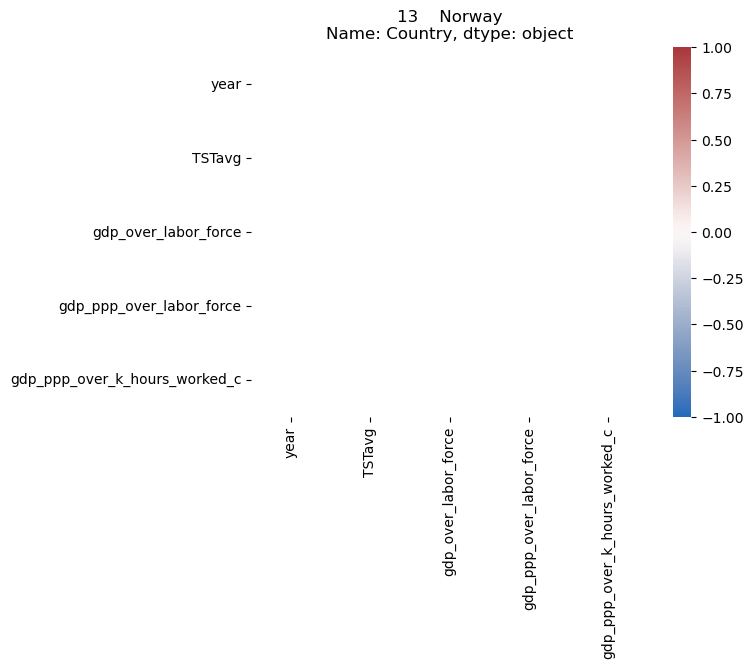

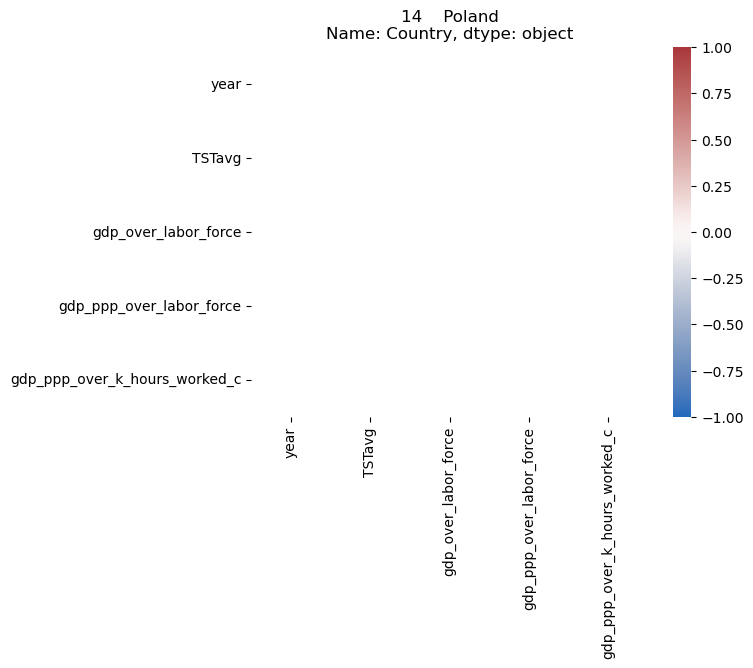

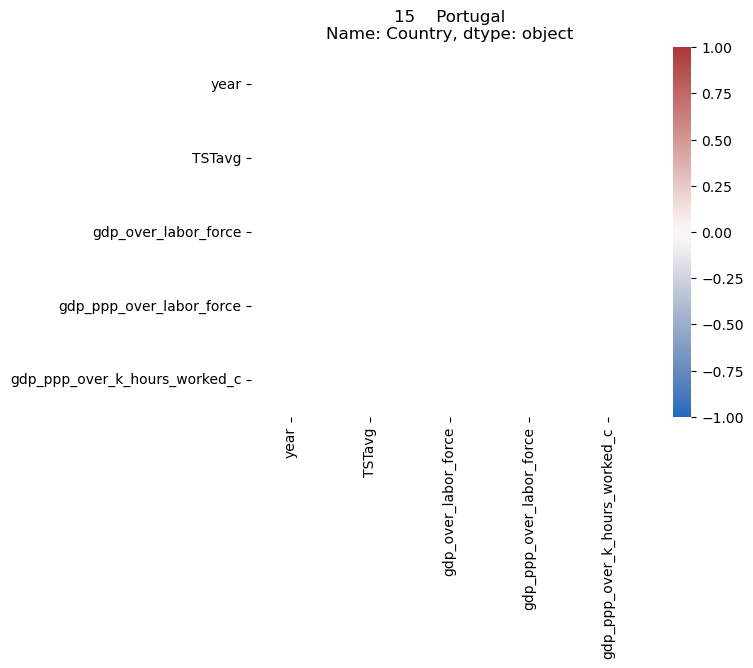

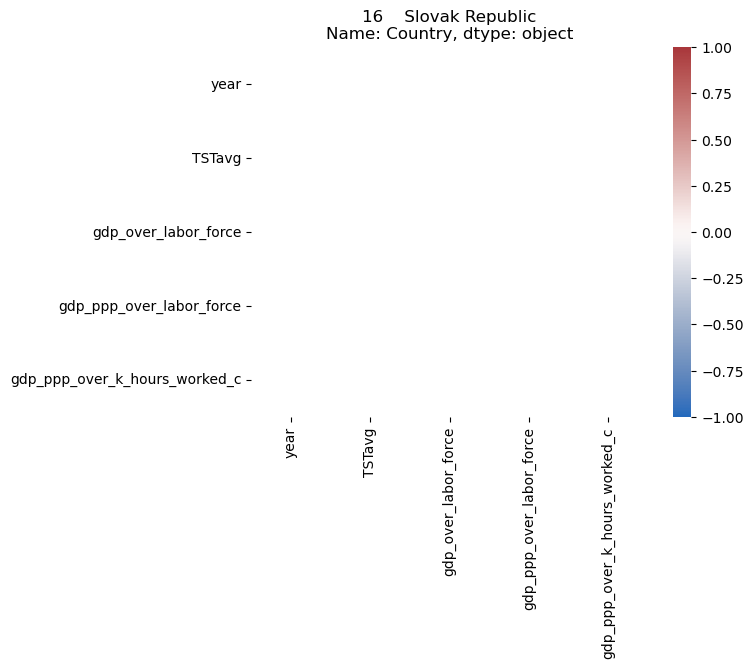

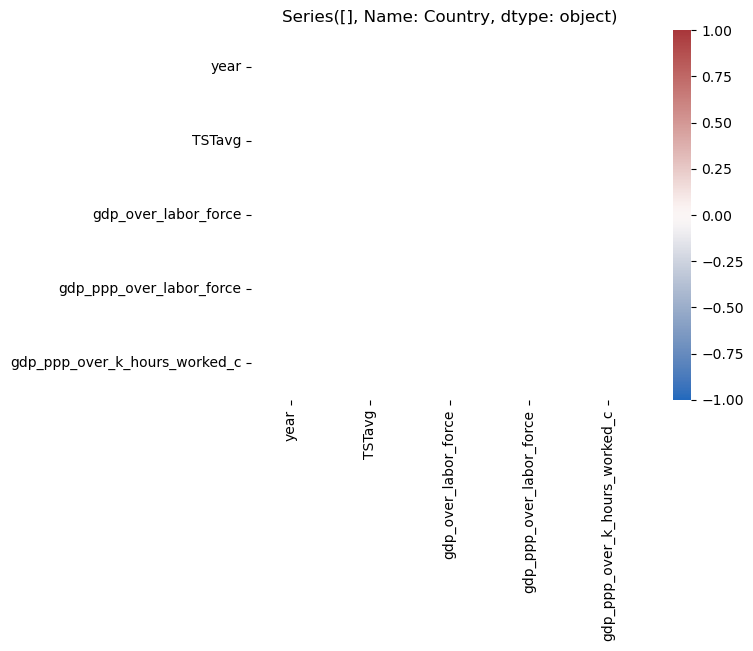

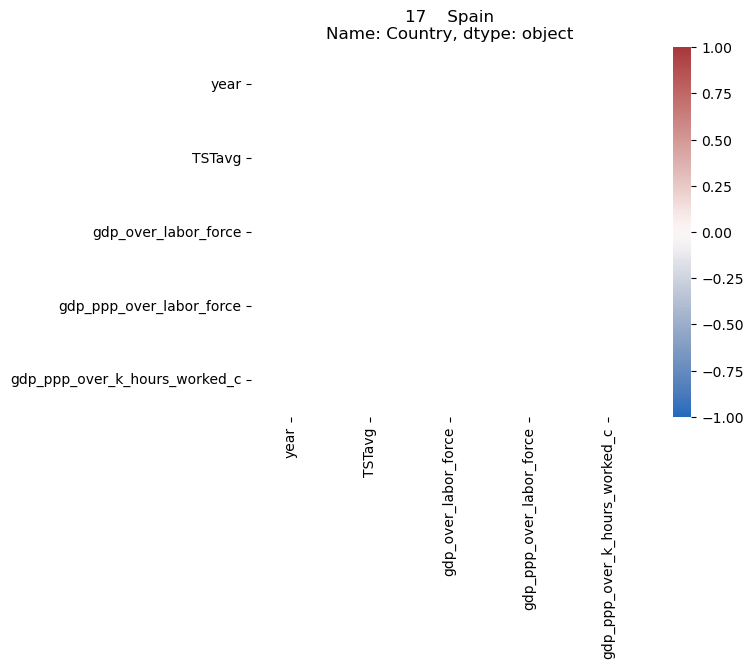

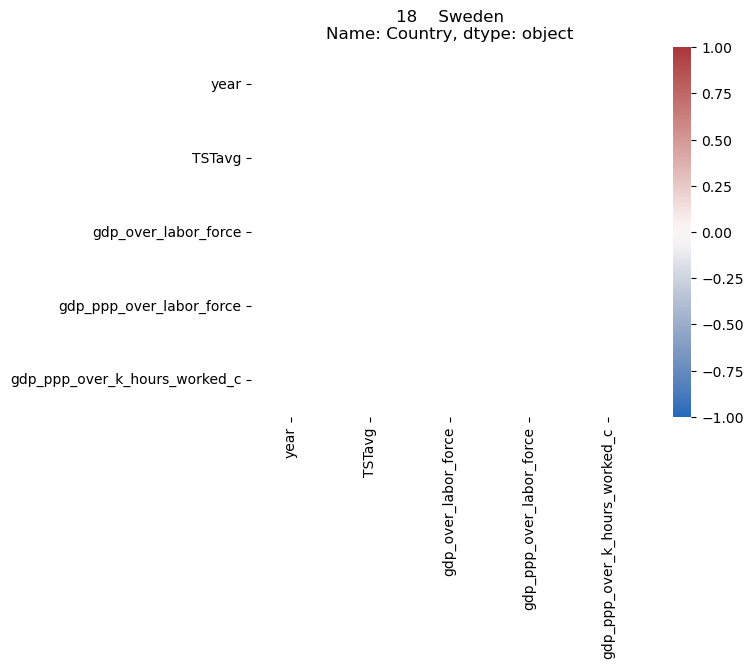

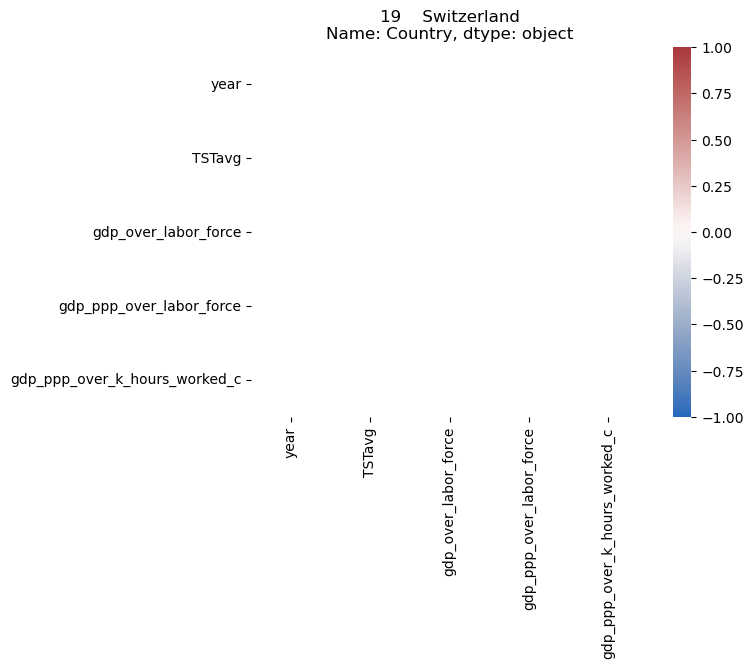

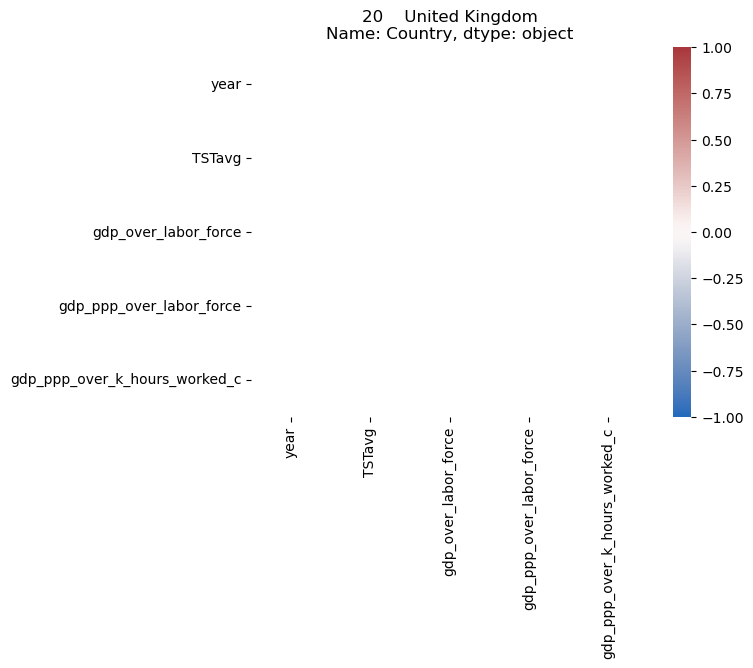

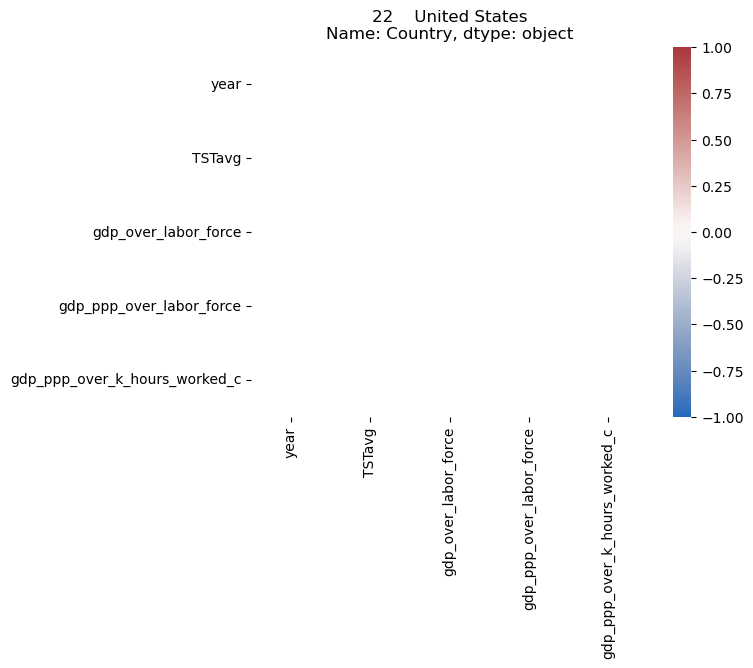

In [69]:
countryCodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'HRV', 
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
    'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 
    'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 
    'LUX', 'NLD', 'NZL', 'NOR', 'POL', 
    'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 
    'CHE', 'GBR', 'USA']

for idex, code in enumerate(countryCodes):
    matrix = gdpAndSleepDf[gdpAndSleepDf['iso3c'] == code][['year', 'TSTavg', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 
                                                            'gdp_ppp_over_k_hours_worked_c']].corr().round(2)
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    plt.title(str(gdpAndSleepDf[(gdpAndSleepDf['iso3c'] == code)]['Country']))
    plt.show()